In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
sns.set_style(style="white")
df = pd.read_csv('../../data/student_performance.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [191]:
df.describe(include="number")

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [192]:
df.describe(include="object")

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [193]:
df.duplicated().sum()

np.int64(0)

In [194]:
df = df.dropna().copy()

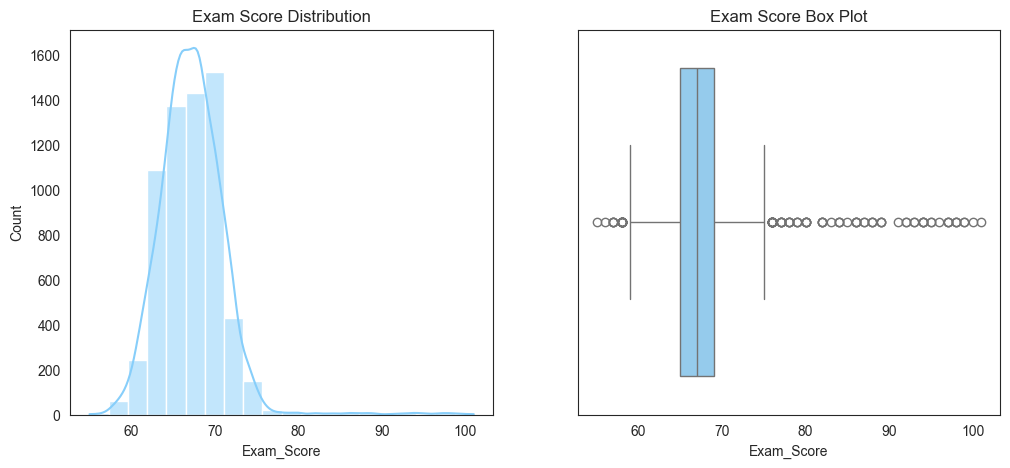

In [195]:
# Target value analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["Exam_Score"], bins=20, color="lightskyblue", kde=True)
plt.title("Exam Score Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(df["Exam_Score"], color="lightskyblue", orient="h")
plt.title("Exam Score Box Plot")
plt.show()

In [196]:
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

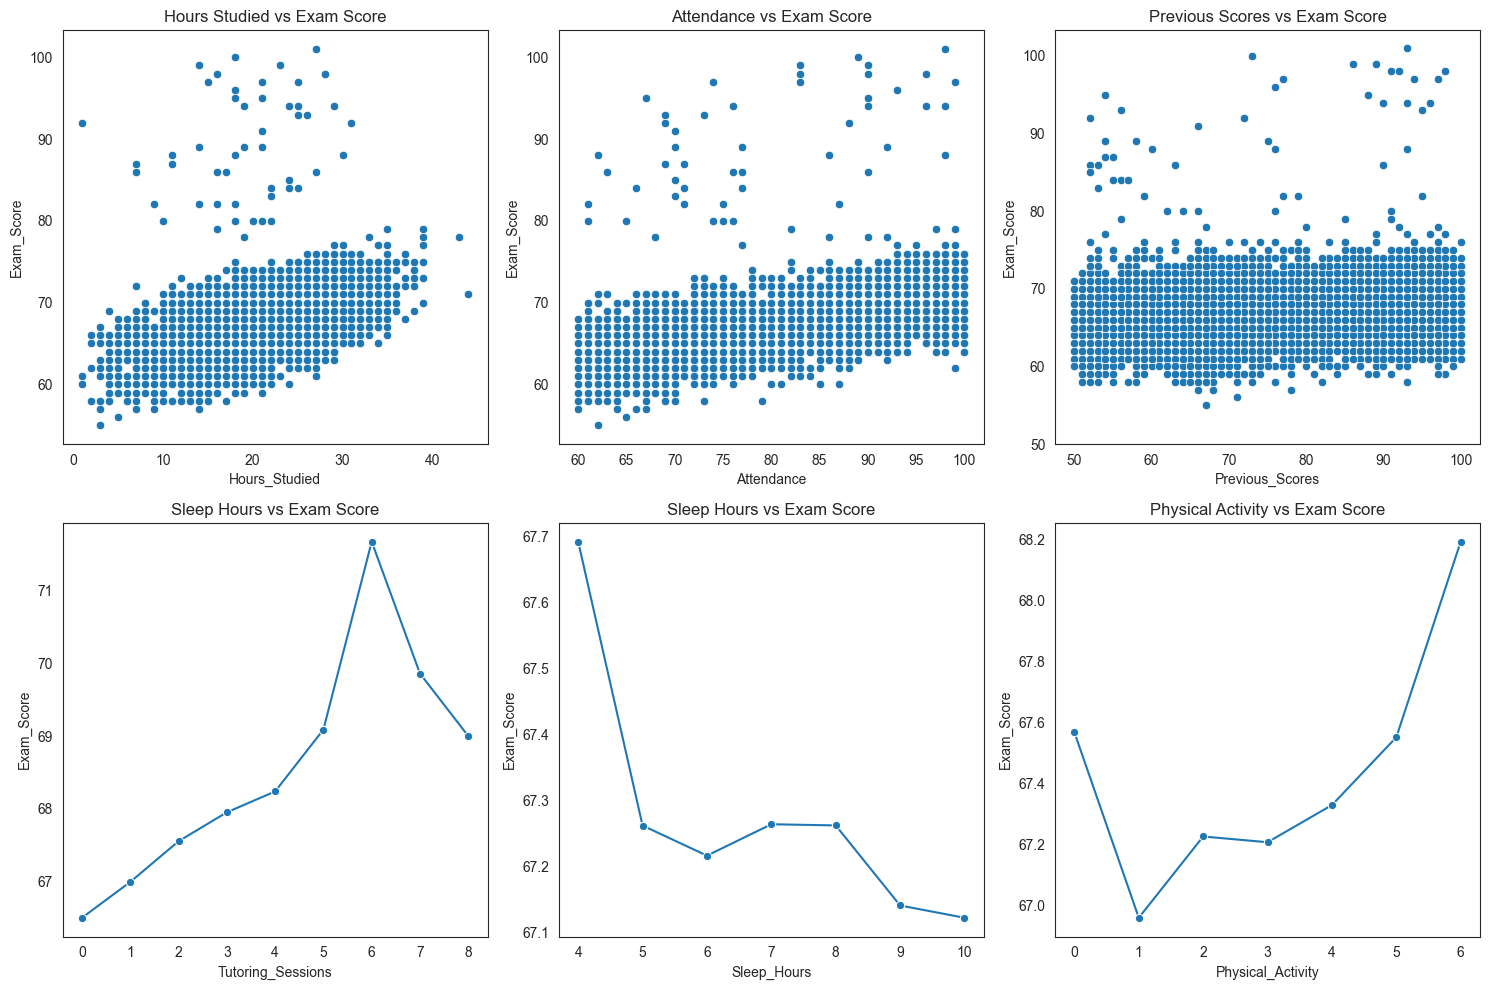

In [197]:
# Analysis of Numeric Values
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


sns.scatterplot(df, x="Hours_Studied", y="Exam_Score", ax=axes[0, 0])
axes[0, 0].set_title("Hours Studied vs Exam Score")

sns.scatterplot(df, x="Attendance", y="Exam_Score", ax=axes[0, 1])
axes[0, 1].set_title("Attendance vs Exam Score")

sns.scatterplot(df, x="Previous_Scores", y="Exam_Score", ax=axes[0, 2])
axes[0, 2].set_title("Previous Scores vs Exam Score")
axes[0, 2].set_yticks(range(50, 101, 10))

sns.lineplot(
    df,
    y="Exam_Score",
    x="Tutoring_Sessions",
    estimator=np.mean,
    marker="o",
    errorbar=None,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Sleep Hours vs Exam Score")

sns.lineplot(
    df,
    y="Exam_Score",
    x="Sleep_Hours",
    estimator=np.mean,
    marker="o",
    errorbar=None,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Sleep Hours vs Exam Score")

sns.lineplot(
    df,
    y="Exam_Score",
    x="Physical_Activity",
    estimator=np.mean,
    marker="o",
    errorbar=None,
    ax=axes[1, 2]
)
axes[1, 2].set_title("Physical Activity vs Exam Score")

plt.tight_layout()
plt.show()

In [198]:
cat_cols

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

In [199]:
for col in cat_cols:
    print(f"\n{col}: {df[col].unique()}")
    print(f"Value counts:\n{df[col].value_counts()}")


Parental_Involvement: ['Low' 'Medium' 'High']
Value counts:
Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64

Access_to_Resources: ['High' 'Medium' 'Low']
Value counts:
Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64

Extracurricular_Activities: ['No' 'Yes']
Value counts:
Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64

Motivation_Level: ['Low' 'Medium' 'High']
Value counts:
Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64

Internet_Access: ['Yes' 'No']
Value counts:
Internet_Access
Yes    5893
No      485
Name: count, dtype: int64

Family_Income: ['Low' 'Medium' 'High']
Value counts:
Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64

Teacher_Quality: ['Medium' 'High' 'Low']
Value counts:
Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64

School_Type: ['Public' '

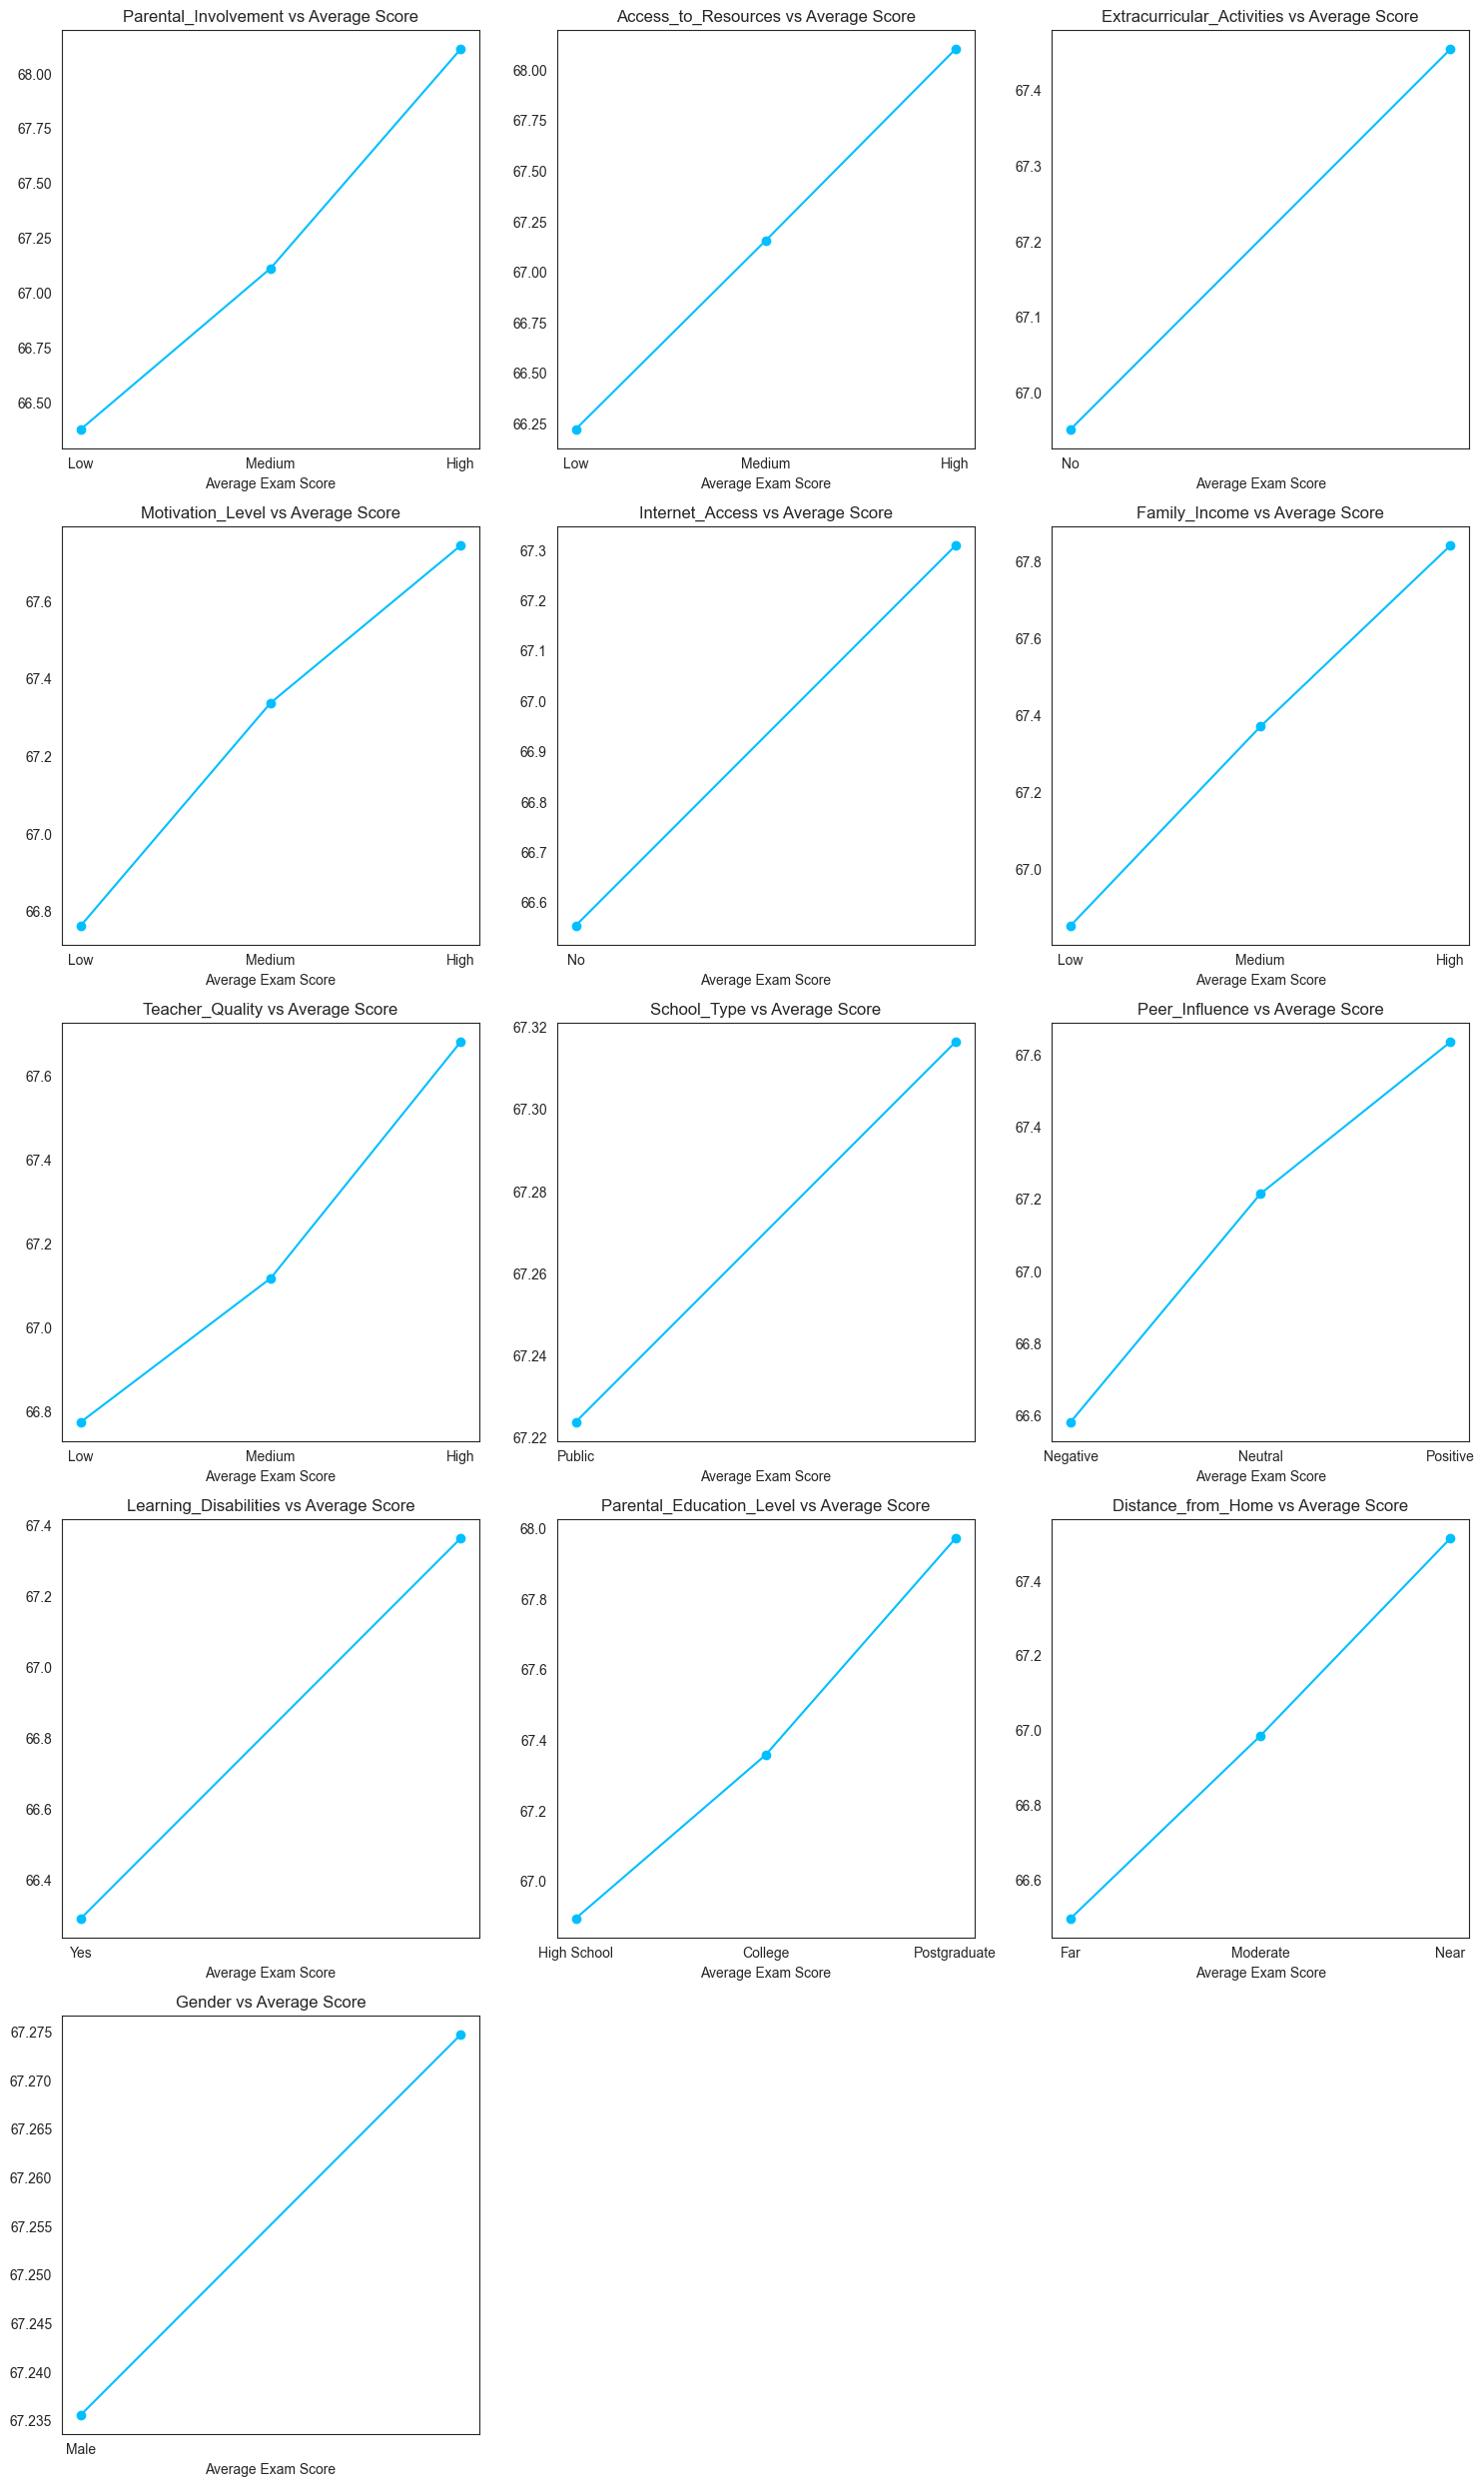

In [201]:
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
axes = axes.ravel()

for idx, col in enumerate(cat_cols):
    df.groupby(col)['Exam_Score'].mean().sort_values().plot(kind='line', ax=axes[idx], marker="o", color="deepskyblue")
    axes[idx].set_xlabel('Average Exam Score')
    axes[idx].set_title(f'{col} vs Average Score')


fig.delaxes(axes[13])
fig.delaxes(axes[14])

plt.tight_layout()
plt.show()

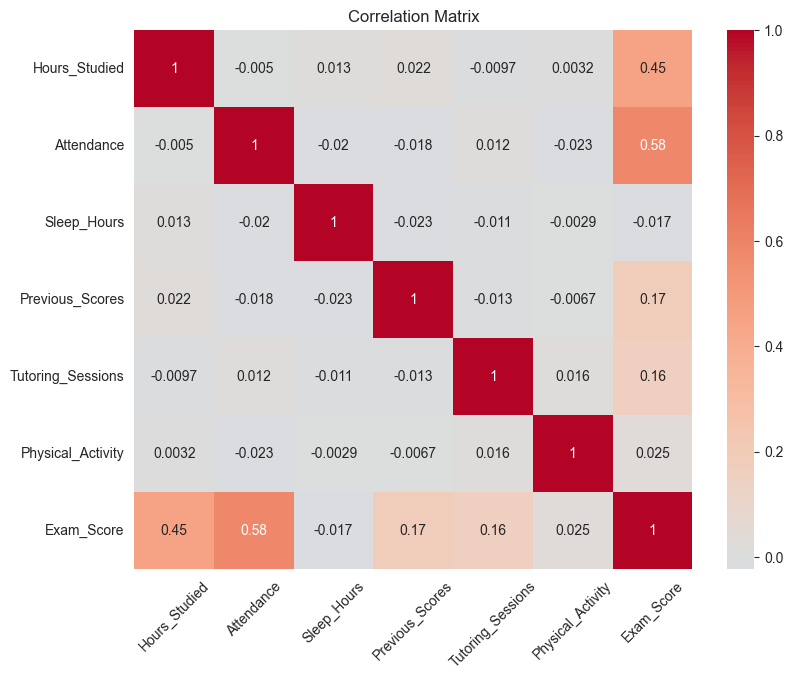

In [203]:
corr = df[num_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

In [204]:
exam_corr = corr["Exam_Score"].sort_values(ascending=False)
print("Top Correlations with the Exam Score")
print(exam_corr.head(5))

Top Correlations with the Exam Score
Exam_Score           1.000000
Attendance           0.580259
Hours_Studied        0.445104
Previous_Scores      0.174283
Tutoring_Sessions    0.156829
Name: Exam_Score, dtype: float64


In [205]:
df['Success_Category'] = pd.cut(df['Exam_Score'], 
                                bins=[0, 60, 65, 70, 75, 85, 100],
                                labels=['F', '60-65', '65-70', '70-75', '75-85', '85-100']
                               )

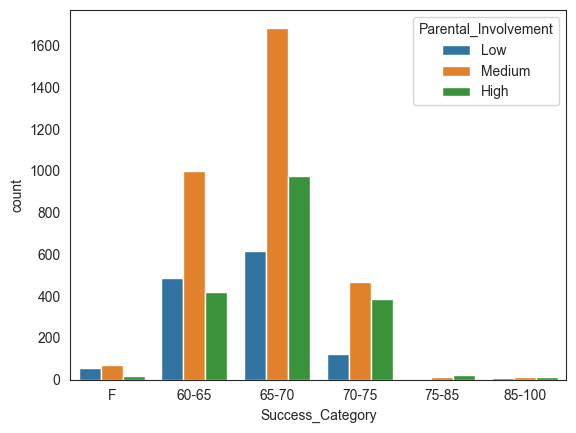

In [208]:
sns.countplot(df, x="Success_Category", hue="Parental_Involvement")
plt.show()

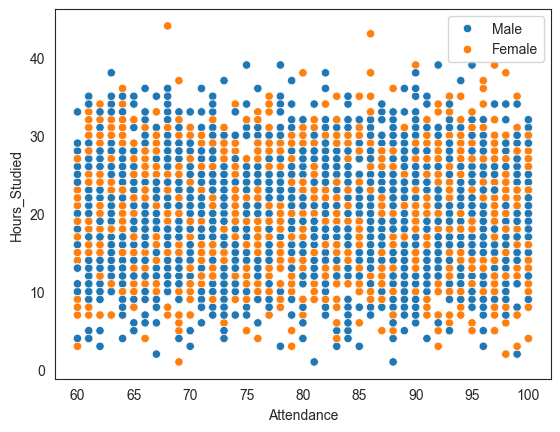

In [209]:
sns.scatterplot(df, x="Attendance", y="Hours_Studied", hue="Gender")
plt.legend()
plt.show()

### Linear Regression

### One variable Linear Regression

Train set shape: (5102, 1)
Test set shape: (1276, 1)

Model coefficients: [0.28834271]
Model intercept: 61.4900
R2 Score:  0.20513060832466712
MSE:  12.351733799445533
MAE:  2.5292420695261244


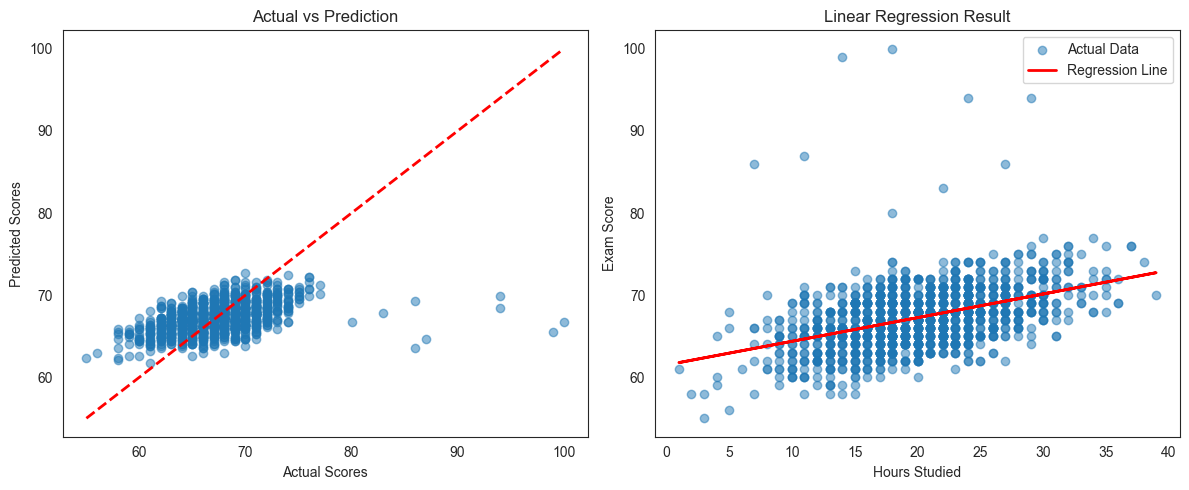

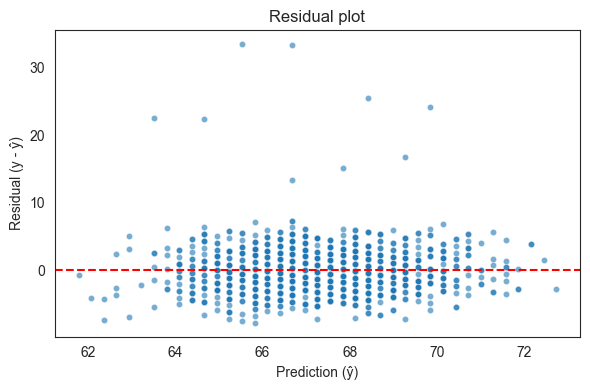

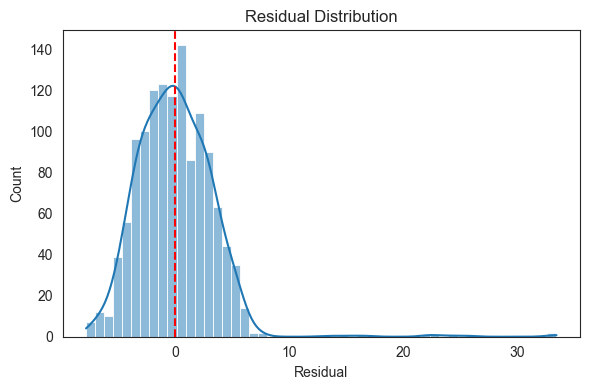

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df[["Hours_Studied"]]
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

model_simple_lr = LinearRegression()
model_simple_lr.fit(X_train, y_train)

# Coefficients
print(f"\nModel coefficients: {model_simple_lr.coef_}")
print(f"Model intercept: {model_simple_lr.intercept_:.4f}")

y_pred_simple_lr = model_simple_lr.predict(X_test)

r2_simple_lr = r2_score(y_test, y_pred_simple_lr)
mse_simple_lr = mean_squared_error(y_test, y_pred_simple_lr)
mae_simple_lr = mean_absolute_error(y_test, y_pred_simple_lr)

print("R2 Score: ", r2_simple_lr)
print("MSE: ", mse_simple_lr)
print("MAE: ", mae_simple_lr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_simple_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Prediction')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred_simple_lr, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression Result')
plt.legend()

plt.tight_layout()
plt.show()


def parity_plot(y_true, y_pred, title="Parity plot"):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)
    lims = [np.min([y_true, y_pred]), np.max([y_true, y_pred])]
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, s=20)
    plt.plot(lims, lims, 'r--', lw=2, label='y = x')
    plt.xlim(lims); plt.ylim(lims)
    plt.xlabel('Actual (y)')
    plt.ylabel('Prediction (ŷ)')
    plt.title(f"{title}  |  R²={r2:.3f}, RMSE={rmse:.3f}")
    plt.legend()
    plt.tight_layout()
    plt.show()


def residual_plot(y_true, y_pred, by='pred'):
    resid = y_true - y_pred
    x = y_pred if by == 'pred' else y_true
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x, y=resid, alpha=0.6, s=20)
    plt.axhline(0, color='r', ls='--')
    plt.xlabel('Prediction (ŷ)' if by=='pred' else 'Actual (y)')
    plt.ylabel('Residual (y - ŷ)')
    plt.title('Residual plot')
    plt.tight_layout()
    plt.show()


def residual_dist(y_true, y_pred):
    resid = y_true - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(resid, kde=True)
    plt.axvline(0, color='r', ls='--')
    plt.xlabel('Residual')
    plt.title('Residual Distribution')
    plt.tight_layout()
    plt.show()


residual_plot(y_test, y_pred_simple_lr)
residual_dist(y_test, y_pred_simple_lr)

### Multi variable Linear Regression

Train set shape: (5102, 5)
Test set shape: (1276, 5)

Model coefficients: [0.29230093 0.19791815 0.04728662 0.48889739 0.1423694 ]
Model intercept: 40.8776
R2 Score:  0.610272006199542
MSE:  6.056109952188768
MAE:  1.3195388846524487


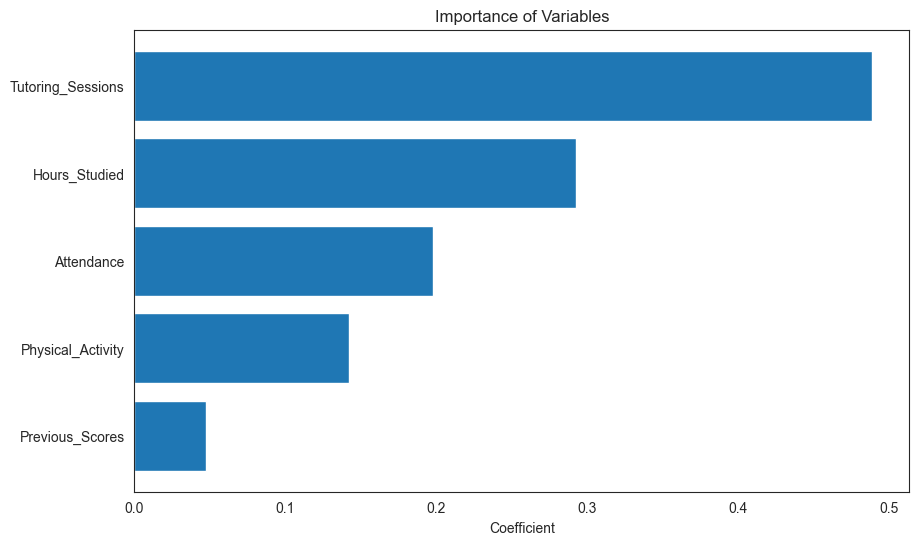

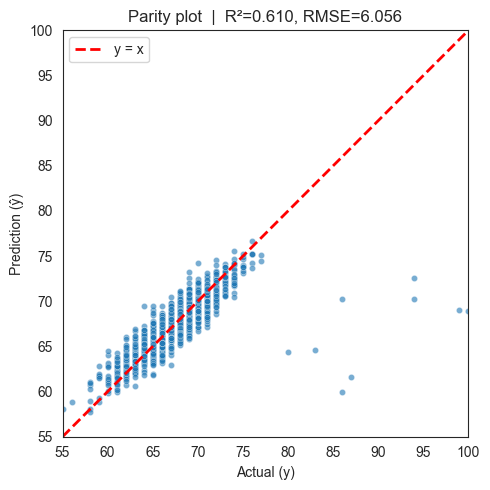

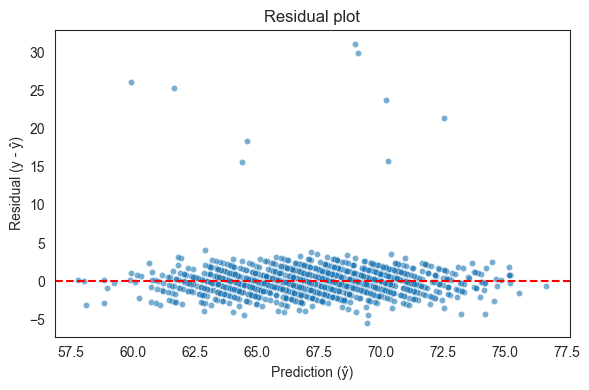

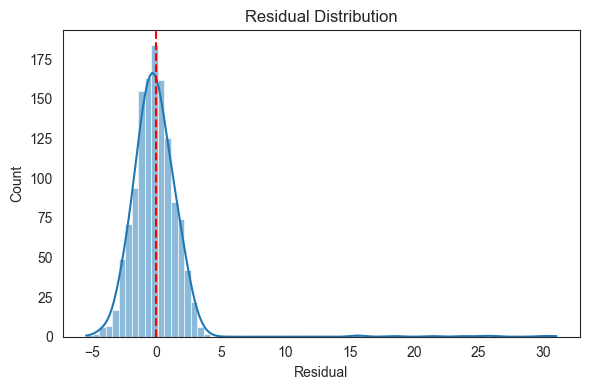

In [214]:
features_selected = ["Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity"]

X = df[features_selected]
y = df["Exam_Score"]

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set shape: {X_train_multi.shape}")
print(f"Test set shape: {X_test_multi.shape}")

model_multi_lr = LinearRegression()
model_multi_lr.fit(X_train_multi, y_train_multi)

# Coefficients
print(f"\nModel coefficients: {model_multi_lr.coef_}")
print(f"Model intercept: {model_multi_lr.intercept_:.4f}")

y_pred_multi_lr = model_multi_lr.predict(X_test_multi)

r2_multi_lr = r2_score(y_test, y_pred_multi_lr)
mse_multi_lr = mean_squared_error(y_test, y_pred_multi_lr)
mae_multi_lr = mean_absolute_error(y_test, y_pred_multi_lr)

print("R2 Score: ", r2_multi_lr)
print("MSE: ", mse_multi_lr)
print("MAE: ", mae_multi_lr)

plt.figure(figsize=(10, 6))
importance = pd.DataFrame({
    'Feature': features_selected,
    'Coefficient': model_multi_lr.coef_
})
importance = importance.sort_values('Coefficient', key=abs, ascending=True)

plt.barh(importance['Feature'], importance['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Importance of Variables')
plt.show()
    
parity_plot(y_test_multi, y_pred_multi_lr)

residual_plot(y_test_multi, y_pred_multi_lr)

residual_dist(y_test_multi, y_pred_multi_lr)

In [215]:
# Performance Comparison
r2_multi = r2_score(y_test_multi, y_pred_multi_lr)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi_lr)

print(f"\nMulti Model Performance:")
print(f"R² Skoru: {r2_multi:.4f} (before: {r2_simple_lr:.4f})")
print(f"RMSE: {mse_multi:.2f} (before: {mse_simple_lr:.2f})")
print(f"Performance Change: %{((r2_multi - r2_simple_lr) / r2_simple_lr * 100):.1f}")


Multi Model Performance:
R² Skoru: 0.6103 (before: 0.2051)
RMSE: 6.06 (before: 12.35)
Performance Change: %197.5


### Regression with almost all variables

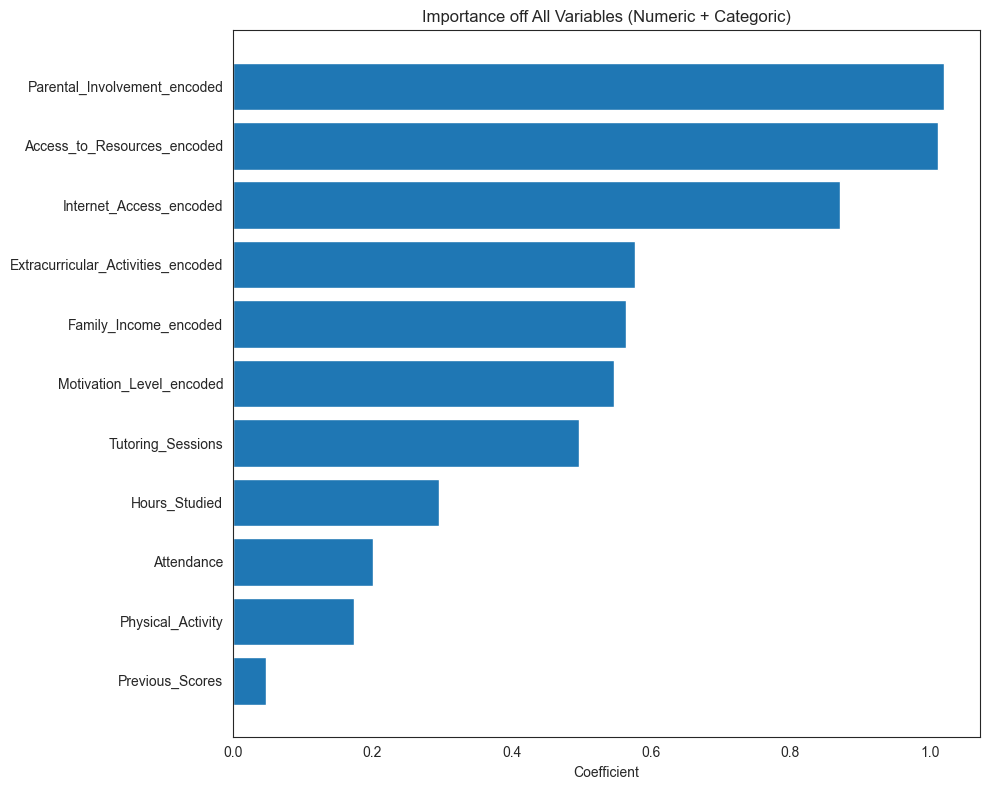

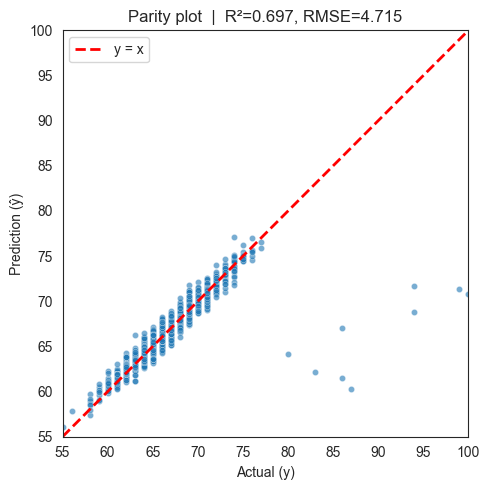

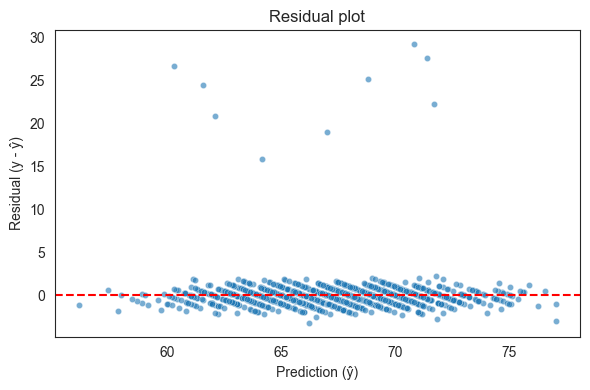

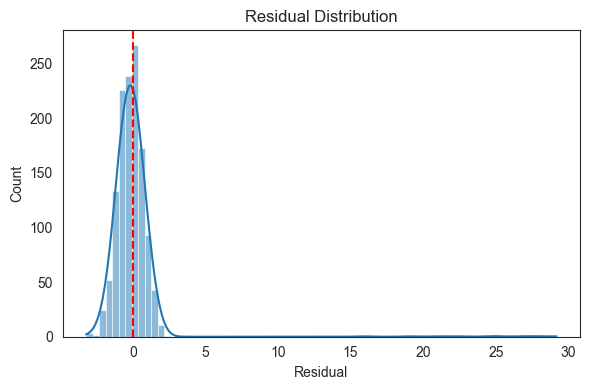

In [216]:
df_encoded = df.copy()

features_numeric = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

ordinal_mappings = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2}
}

# Encoding
for col, mapping in ordinal_mappings.items():
    df_encoded[f'{col}_encoded'] = df[col].map(mapping)

# Encoding for binary variables
binary_mappings = {
    'Internet_Access': {'Yes': 1, 'No': 0},
    'Extracurricular_Activities': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    df_encoded[f'{col}_encoded'] = df[col].map(mapping)

# New features list (numeric + encoded categoric)
features_with_categorical = features_numeric + [
    'Parental_Involvement_encoded',
    'Motivation_Level_encoded', 
    'Access_to_Resources_encoded',
    'Family_Income_encoded',
    'Internet_Access_encoded',
    'Extracurricular_Activities_encoded'
]

X_with_cat = df_encoded[features_with_categorical]
y = df_encoded['Exam_Score']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_with_cat, y, test_size=0.2, random_state=42
)

model_with_cat = LinearRegression()
model_with_cat.fit(X_train_cat, y_train_cat)

y_pred_cat = model_with_cat.predict(X_test_cat)

r2_cat = r2_score(y_test_cat, y_pred_cat)
mse_cat = mean_squared_error(y_test_cat, y_pred_cat)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features_with_categorical,
    'Coefficient': model_with_cat.coef_
}).sort_values('Coefficient', key=abs)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Importance off All Variables (Numeric + Categoric)')
plt.tight_layout()
plt.show()

parity_plot(y_test_cat, y_pred_cat)

residual_plot(y_test_cat, y_pred_cat)

residual_dist(y_test_cat, y_pred_cat)

In [217]:
print("\n=== MODEL COMPARİSON ===")
print(f"Multi Variable Regression(Previous Model) R²: {r2_multi:.4f}")
print(f"Numeric + Categoric Variables R²: {r2_cat:.4f}")
print(f"Performance Change: %{((r2_cat - r2_multi) / r2_multi * 100):.1f}")
print(f"\nMSE (Numeric + Categoric): {mse_cat:.2f}")


=== MODEL COMPARİSON ===
Multi Variable Regression(Previous Model) R²: 0.6103
Numeric + Categoric Variables R²: 0.6966
Performance Change: %14.1

MSE (Numeric + Categoric): 4.71


### Polynomial Regression

=== 2 VARIABLES POLYNOMIAL REGRESSION ===

Created Features (5 features):
1. Hours_Studied
2. Sleep_Hours
3. Hours_Studied^2
4. Hours_Studied Sleep_Hours
5. Sleep_Hours^2

Model Performance:
R² Score: 0.2044
MSE: 12.36


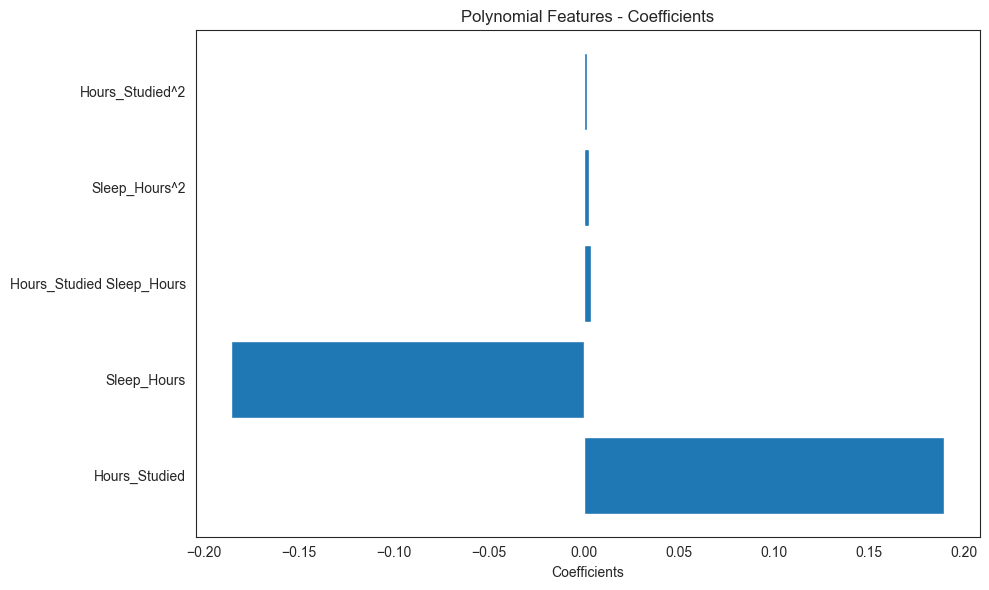

In [220]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. BASIC POLYNOMIAL REGRESSİON (2 variable)
print("=== 2 VARIABLES POLYNOMIAL REGRESSION ===")

X_poly_multi = df[['Hours_Studied', 'Sleep_Hours']]
y = df['Exam_Score']

# Polynomial features (degree=2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly_multi)

feature_names = poly_features.get_feature_names_out(['Hours_Studied', 'Sleep_Hours'])
print(f"\nCreated Features ({len(feature_names)} features):")
for i, name in enumerate(feature_names):
    print(f"{i+1}. {name}")

# Train-test split
X_train_poly2, X_test_poly2, y_train_poly2, y_test_poly2 = train_test_split(
    X_poly_transformed, y, test_size=0.2, random_state=42
)

# Model
model_poly_multi = LinearRegression()
model_poly_multi.fit(X_train_poly2, y_train_poly2)

# Performance
y_pred_poly2 = model_poly_multi.predict(X_test_poly2)
r2_poly2 = r2_score(y_test_poly2, y_pred_poly2)
mse_poly2 = mean_squared_error(y_test_poly2, y_pred_poly2)

print(f"\nModel Performance:")
print(f"R² Score: {r2_poly2:.4f}")
print(f"MSE: {mse_poly2:.2f}")

# Visualization of Coefficient
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_poly_multi.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficients')
plt.title('Polynomial Features - Coefficients')
plt.tight_layout()
plt.show()

Residual Distribution of Degree 1


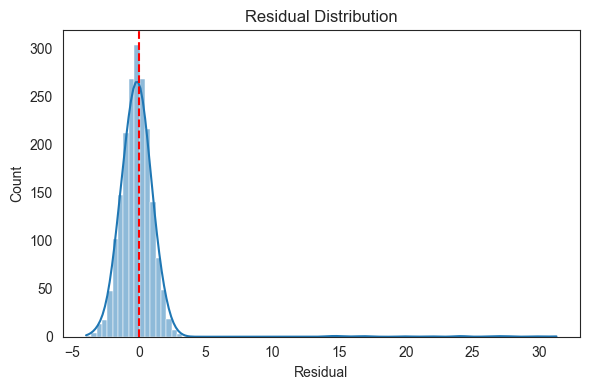

Residual Distribution of Degree 2


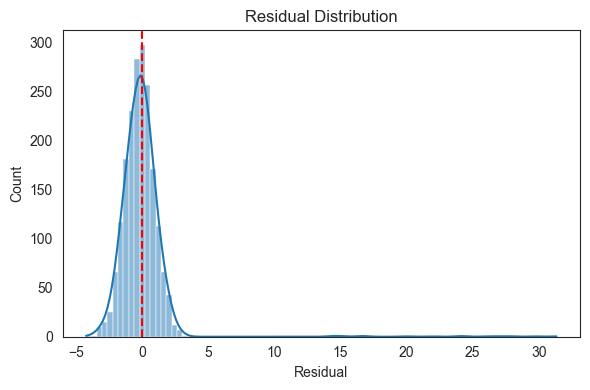

Residual Distribution of Degree 3


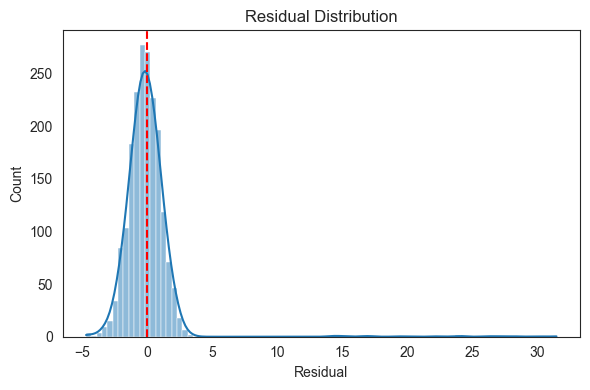

Residual Distribution of Degree 4


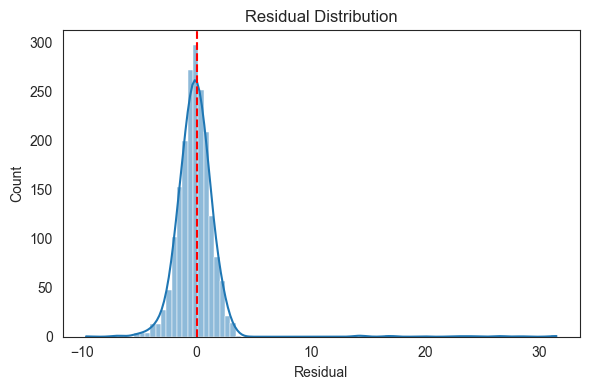

Residual Distribution of Degree 5


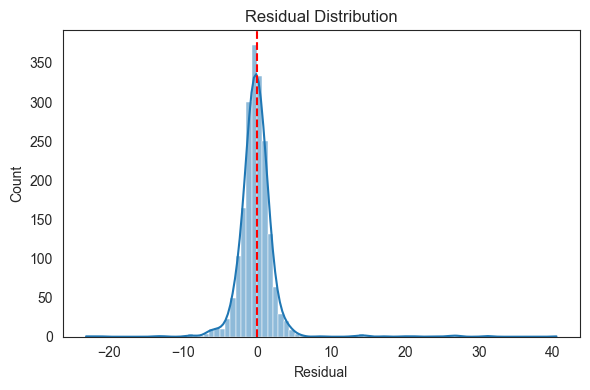


=== POLYNOMIAL DEGREE COMPARİSON ===
   Degree  N_Features  Train_R2   Test_R2  Overfitting
0       1           8  0.651586  0.678030    -0.026444
1       2          44  0.654174  0.674866    -0.020692
2       3         164  0.665590  0.660980     0.004611
3       4         494  0.689325  0.623345     0.065980
4       5        1286  0.737314  0.435416     0.301898


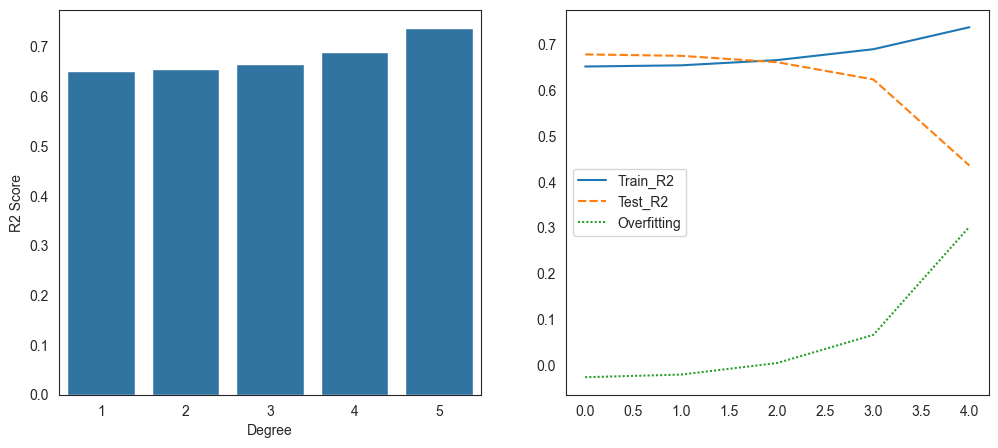

In [221]:
X_full = [
            'Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
            'Access_to_Resources_encoded', 'Sleep_Hours',
            'Extracurricular_Activities_encoded', 'Parental_Involvement_encoded'
]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    df_encoded[X_full], y, test_size=0.3, random_state=42
)

degrees = [1, 2, 3, 4, 5]
results = []

for degree in degrees:
    # Pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('regressor', LinearRegression())
    ])
    
    # Eğit
    pipe.fit(X_train_full, y_train_full)
    
    # Tahmin
    y_pred_train = pipe.predict(X_train_full)
    y_pred_test = pipe.predict(X_test_full)
    
    # Skorlar
    train_r2 = r2_score(y_train_full, y_pred_train)
    test_r2 = r2_score(y_test_full, y_pred_test)
    n_features = pipe.named_steps['poly'].n_output_features_

    print(f"Residual Distribution of Degree {degree}")
    residual_dist(y_test_full, y_pred_test)
    
    results.append({
        'Degree': degree,
        'N_Features': n_features,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Overfitting': train_r2 - test_r2
    })

results_df = pd.DataFrame(results)
print("\n=== POLYNOMIAL DEGREE COMPARİSON ===")
print(results_df)

# Görselleştir
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(results_df, x='Degree', y='Train_R2')
plt.xlabel("Degree")
plt.ylabel("R2 Score")
plt.subplot(1, 2, 2)
sns.lineplot(results_df.drop(["N_Features", "Degree"], axis=1))
plt.legend()
plt.show()

### Logistic Regression

=== LOGISTIC REGRESSION ===
Class Distribution:
Pass
1    4982
0    1396
Name: count, dtype: int64

Success Rate: %78.1

Accuracy: %93.7

Detailed Classification Report:
              precision    recall  f1-score   support

        Fail       0.88      0.83      0.85       279
        Pass       0.95      0.97      0.96       997

    accuracy                           0.94      1276
   macro avg       0.91      0.90      0.91      1276
weighted avg       0.94      0.94      0.94      1276



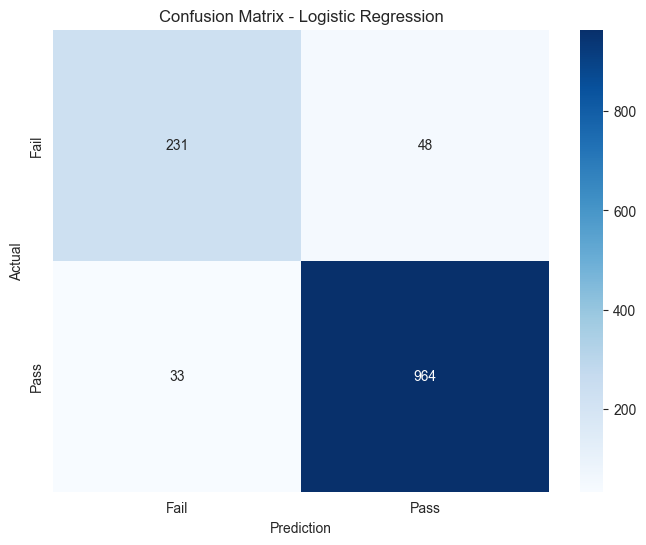


Feature Coefficients (Log-odds):
                               Feature  Coefficient
7          Access_to_Resources_encoded     2.117436
5         Parental_Involvement_encoded     2.058671
9              Internet_Access_encoded     1.574032
6             Motivation_Level_encoded     1.158189
3                    Tutoring_Sessions     1.078239
10  Extracurricular_Activities_encoded     1.043299
8                Family_Income_encoded     1.035132
0                        Hours_Studied     0.621917
4                    Physical_Activity     0.495808
1                           Attendance     0.421794
2                      Previous_Scores     0.094252


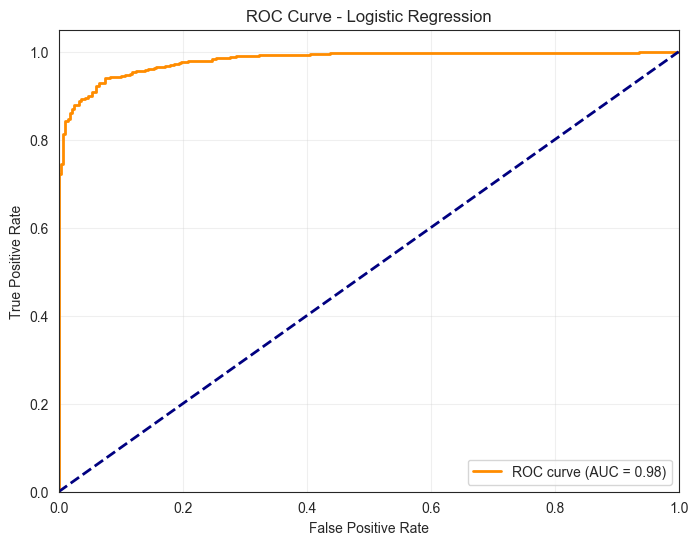

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


print("=== LOGISTIC REGRESSION ===")

# Creating binary target
df_encoded['Pass'] = (df['Exam_Score'] >= 65).astype(int)

print("Class Distribution:")
print(df_encoded['Pass'].value_counts())
print(f"\nSuccess Rate: %{(df_encoded['Pass'].sum() / len(df)) * 100:.1f}")

X_class = df_encoded[features_with_categorical]
y_class = df_encoded['Pass']

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Logistic Regression Model
log_model = LogisticRegression(random_state=1, max_iter=1000)
log_model.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = log_model.predict(X_test_class)
y_pred_proba = log_model.predict_proba(X_test_class)[:, 1]  # Başarılı olma olasılığı

# Model Performance
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\nAccuracy: %{accuracy * 100:.1f}")

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test_class, y_pred_class, 
                          target_names=['Fail', 'Pass']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

# Coefficients
coef_df = pd.DataFrame({
    'Feature': X_class.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients (Log-odds):")
print(coef_df)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Risk Analysis


=== RİSK ANALYSİS ===
Risk students count: 227

Risk students describe:
       Hours_Studied  Attendance  Previous_Scores  Tutoring_Sessions  \
count     227.000000  227.000000       227.000000         227.000000   
mean       14.484581   68.453744        69.951542           1.220264   
std         5.010032    6.918701        14.064086           1.138596   
min         2.000000   60.000000        50.000000           0.000000   
25%        11.000000   63.000000        57.000000           0.000000   
50%        15.000000   67.000000        68.000000           1.000000   
75%        18.000000   73.000000        80.000000           2.000000   
max        28.000000   99.000000       100.000000           5.000000   

       Physical_Activity  Parental_Involvement_encoded  \
count         227.000000                    227.000000   
mean            3.048458                      0.920705   
std             1.014207                      0.667092   
min             1.000000                      

<Figure size 1000x600 with 0 Axes>

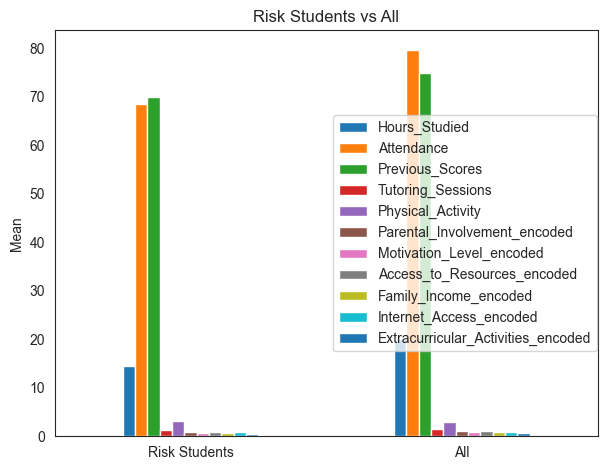

In [223]:
# Students that have high probability of Fail
risk_threshold = 0.3  # Success probabilities lower than 30%

risk_indices = np.where(y_pred_proba < risk_threshold)[0]
risk_students = X_test_class.iloc[risk_indices]

print(f"\n=== RİSK ANALYSİS ===")
print(f"Risk students count: {len(risk_students)}")
print(f"\nRisk students describe:")
print(risk_students.describe())

# Visualize Risk Factors
if len(risk_students) > 0:
    plt.figure(figsize=(10, 6))
    risk_comparison = pd.DataFrame({
        'Risk Students': risk_students.mean(),
        'All': X_test_class.mean()
    }).T
    
    risk_comparison.plot(kind='bar')
    plt.title('Risk Students vs All')
    plt.ylabel('Mean')
    plt.xticks(rotation=0)
    plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.5))
    plt.tight_layout()
    plt.show()

### KNN(K-Nearest Neighbors)


=== K-NEAREST NEIGHBORS ===
En iyi K değeri: 22
En iyi test R² skoru: 0.6004


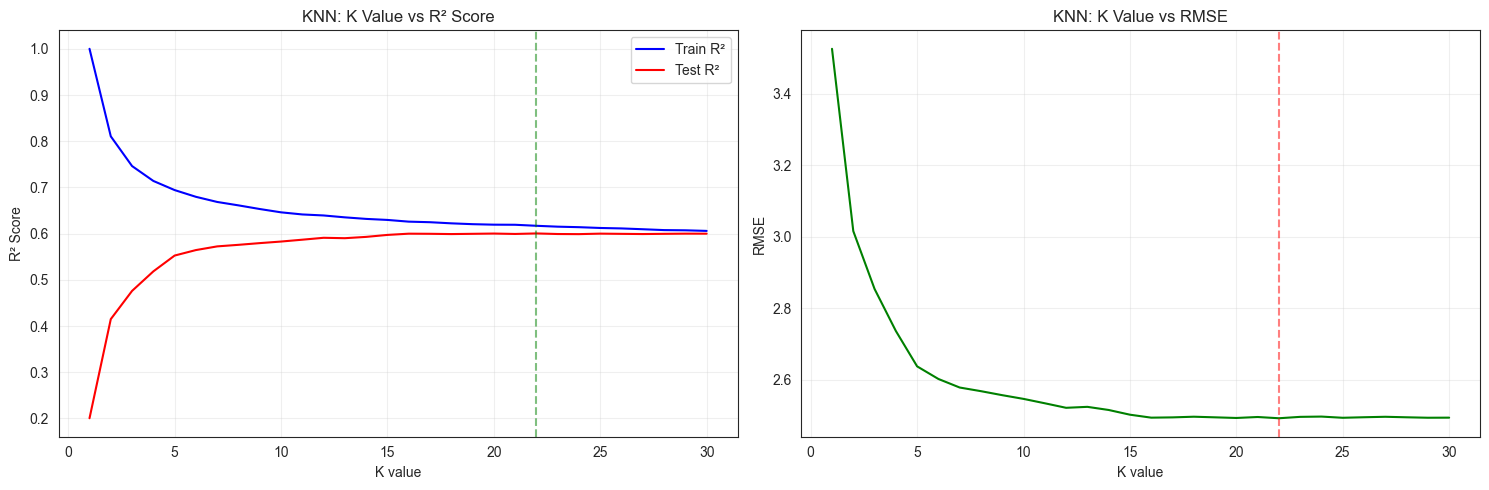


KNN Model Performansı (K=22):
R² Score: 0.6004
MSE: 6.21
MAE: 1.34


In [224]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

print("\n=== K-NEAREST NEIGHBORS ===")

# KNN FOR REGRESSION
scaler = StandardScaler()

X_knn = df_encoded[X_full]
y_knn = df['Exam_Score']

# Train-test split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

# Scaling
X_train_scaled = scaler.fit_transform(X_train_knn)
X_test_scaled = scaler.transform(X_test_knn)

# Finding Optimal K value
k_values = range(1, 31)
train_scores = []
test_scores = []
rmse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_knn)
    
    # Scores
    train_score = knn.score(X_train_scaled, y_train_knn)
    test_score = knn.score(X_test_scaled, y_test_knn)
    
    # RMSE
    y_pred_k = knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test_knn, y_pred_k))
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    rmse_scores.append(rmse)

# Optimal K
best_k_idx = np.argmax(test_scores)
best_k = k_values[best_k_idx]
best_test_score = test_scores[best_k_idx]

print(f"En iyi K değeri: {best_k}")
print(f"En iyi test R² skoru: {best_test_score:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# R² Scores
ax1.plot(k_values, train_scores, 'b-', label='Train R²')
ax1.plot(k_values, test_scores, 'r-', label='Test R²')
ax1.axvline(x=best_k, color='g', linestyle='--', alpha=0.5)
ax1.set_xlabel('K value')
ax1.set_ylabel('R² Score')
ax1.set_title('KNN: K Value vs R² Score')
ax1.legend()
ax1.grid(True, alpha=0.3)

# RMSE Scores
ax2.plot(k_values, rmse_scores, 'g-')
ax2.axvline(x=best_k, color='r', linestyle='--', alpha=0.5)
ax2.set_xlabel('K value')
ax2.set_ylabel('RMSE')
ax2.set_title('KNN: K Value vs RMSE')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final model with the best K value
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train_knn)
y_pred_knn = knn_best.predict(X_test_scaled)

# Performance
r2_knn = r2_score(y_test_knn, y_pred_knn)
mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
mae_knn = mean_absolute_error(y_test_knn, y_pred_knn)

print(f"\nKNN Model Performansı (K={best_k}):")
print(f"R² Score: {r2_knn:.4f}")
print(f"MSE: {mse_knn:.2f}")
print(f"MAE: {mae_knn:.2f}")


=== KNN CLASSIFIER ===
Best K for Classification: 16
KNN Classifier Accuracy: %90.0


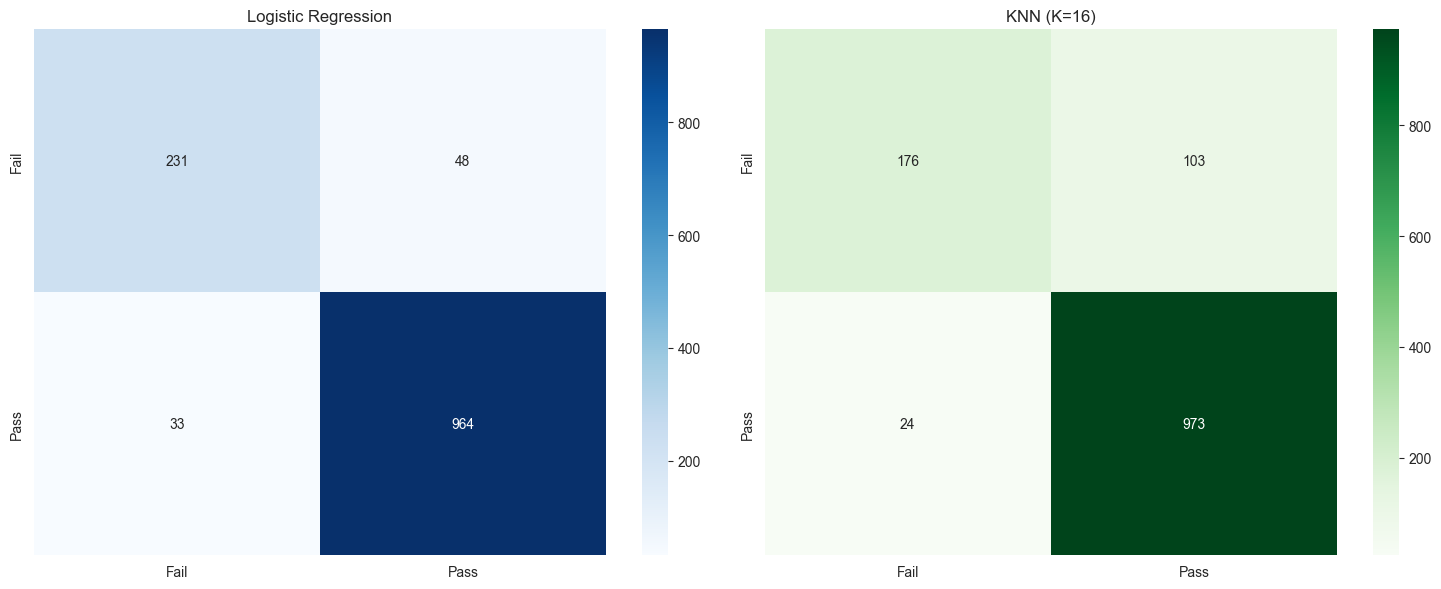

In [225]:
# KNN CLASSIFIER
print("\n=== KNN CLASSIFIER ===")

# Use the same binary target
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Finding optimal K value
k_values_class = range(3, 31) 
accuracy_scores = []

for k in k_values_class:
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(X_train_class_scaled, y_train_class)
    
    accuracy = knn_class.score(X_test_class_scaled, y_test_class)
    accuracy_scores.append(accuracy)

# Best K
best_k_class = k_values_class[np.argmax(accuracy_scores)]
print(f"Best K for Classification: {best_k_class}")

# Final model
knn_classifier = KNeighborsClassifier(n_neighbors=best_k_class)
knn_classifier.fit(X_train_class_scaled, y_train_class)
y_pred_knn_class = knn_classifier.predict(X_test_class_scaled)

# Performance
accuracy_knn = accuracy_score(y_test_class, y_pred_knn_class)
print(f"KNN Classifier Accuracy: %{accuracy_knn * 100:.1f}")

# Confusion Matrix karşılaştırması
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Logistic Regression CM
cm_log = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'], ax=ax1)
ax1.set_title('Logistic Regression')

# KNN CM
cm_knn = confusion_matrix(y_test_class, y_pred_knn_class)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'], ax=ax2)
ax2.set_title(f'KNN (K={best_k_class})')

plt.tight_layout()
plt.show()

### Comparing All Models


=== ALL MODELS - SUMMARY TABLE ===
                           Model  R² Score        MSE Accuracy  Feature Count
 Linear Regression (4 variables)  0.610272    6.05611        -              4
 Linear Regression (+ categoric)  0.696596   4.714689        -              9
Polynomial Regression (degree=2)  0.204448  12.362345        -           1286
           KNN Regression (K=22)  0.600385   6.209746        -              4
             Logistic Regression         -          -    %88.6              4
           KNN Classifier (K=16)         -          -    %90.0              4


Text(0.5, 1.0, "Models' R2 Score")

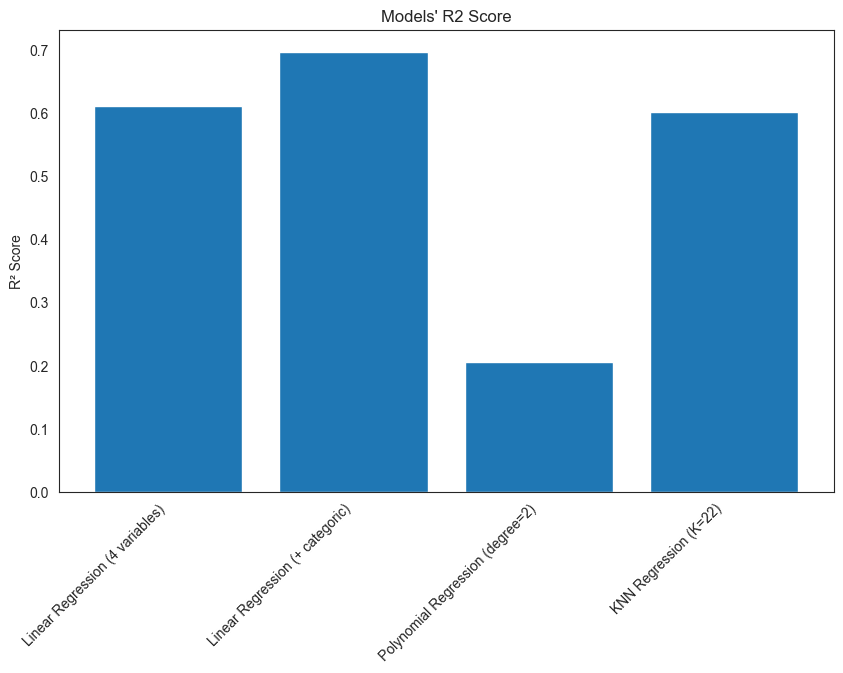

In [226]:
# Model comparison table
print("\n=== ALL MODELS - SUMMARY TABLE ===")

comparison_data = {
    'Model': [
        'Linear Regression (4 variables)',
        'Linear Regression (+ categoric)',
        'Polynomial Regression (degree=2)',
        'KNN Regression (K={})'.format(best_k),
        'Logistic Regression',
        'KNN Classifier (K={})'.format(best_k_class)
    ],
    'R² Score': [
        r2_multi,
        r2_cat,
        r2_poly2,
        r2_knn,
        '-',
        '-'
    ],
    'MSE': [
        mse_multi,
        mse_cat,
        mse_poly2,
        mse_knn,
        '-',
        '-'
    ],
    'Accuracy': [
        '-',
        '-',
        '-',
        '-',
        f'%{accuracy * 100:.1f}',
        f'%{accuracy_knn * 100:.1f}'
    ],
    'Feature Count': [
        4,
        9,
        n_features,
        4,
        4,
        4
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

regression_models = comparison_df[comparison_df['R² Score'] != '-']

plt.figure(figsize=(10, 6))
x = range(len(regression_models))
plt.bar(x, regression_models['R² Score'].astype(float))
plt.xticks(x, regression_models['Model'], rotation=45, ha='right')
plt.ylabel('R² Score')
plt.title("Models' R2 Score")